--- Descriptive Statistics ---
       avg_gas_price_gwei  nft_sales_volume_eth  eth_price_usd  \
count          180.000000            180.000000     180.000000   
mean             2.605047           3284.120371    3512.357849   
std              1.680167           2833.162869     844.560417   
min              0.849160            124.641068    1791.422326   
25%              1.431813           1754.172260    2559.432465   
50%              1.926308           2414.620562    3793.571493   
75%              3.304839           3914.845001    4296.565087   
max              9.082722          18613.262380    4791.514861   

       fear_greed_score  new_addresses  
count        180.000000     180.000000  
mean          58.161111  129233.633333  
std           14.060191   17877.296513  
min           22.000000   92460.000000  
25%           49.000000  115601.500000  
50%           61.500000  127705.000000  
75%           71.000000  140620.750000  
max           79.000000  202178.000000  

Most

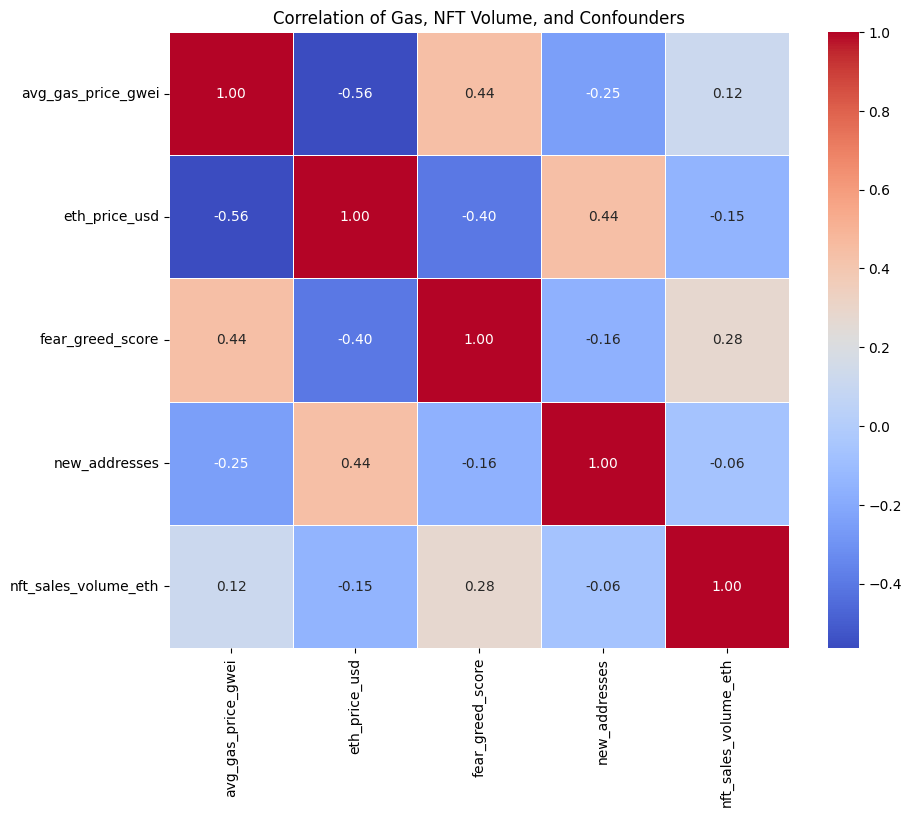

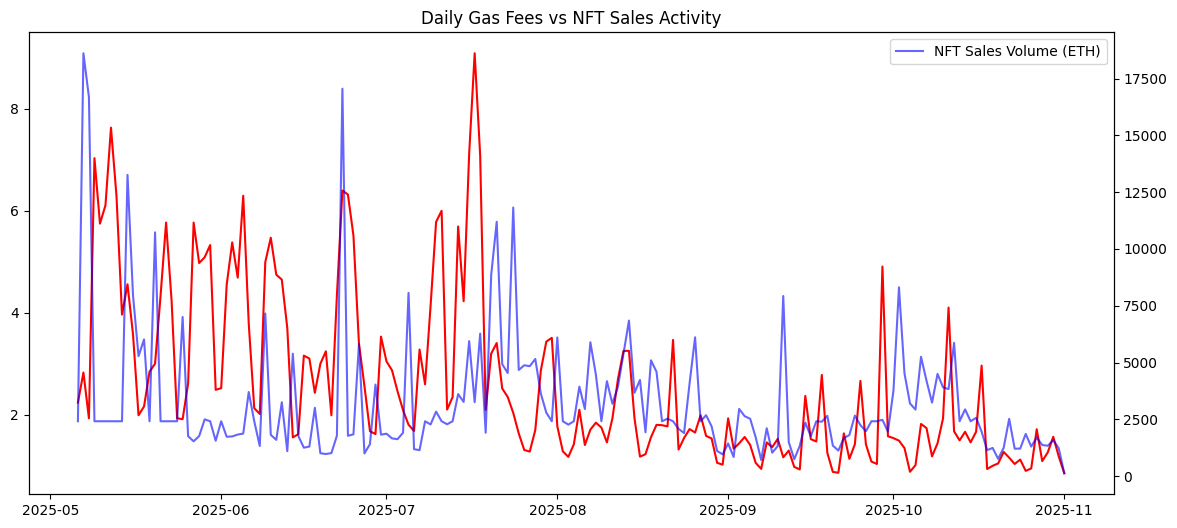

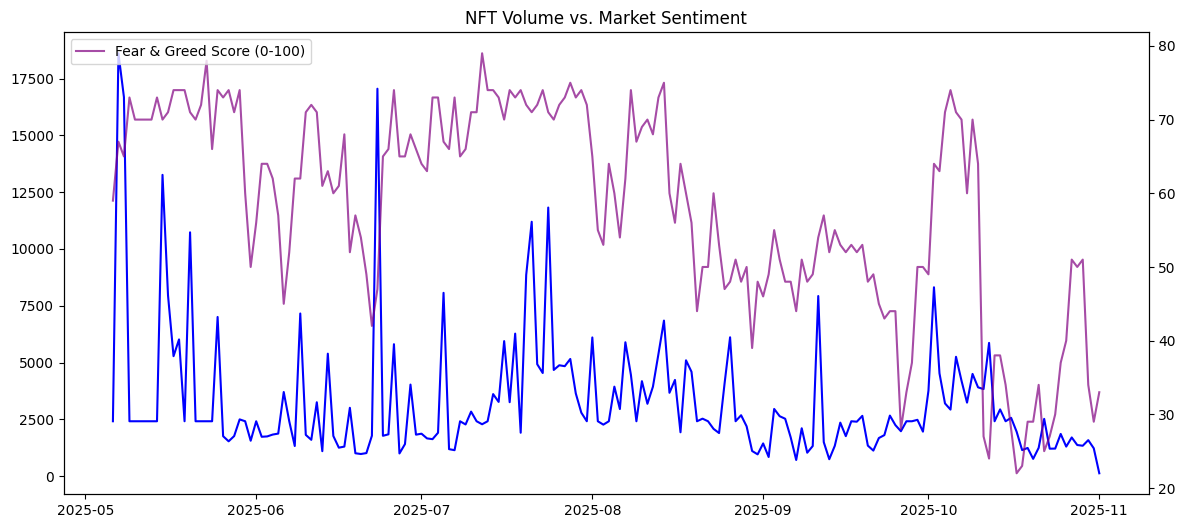

In [1]:
# =========================================================================
# PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)
# =========================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the merged data
df = pd.read_csv(os.path.join('../data/', 'merged_timeseries_final_imputed.csv'), index_col='date', parse_dates=True)

# --- 1. Descriptive Statistics ---
print("--- Descriptive Statistics ---")
print(df[['avg_gas_price_gwei', 'nft_sales_volume_eth', 'eth_price_usd', 'fear_greed_score', 'new_addresses']].describe())
print("\nMost Frequent Market Sentiment:")
print(df['fear_greed_rating'].value_counts())

# --- 2. Correlation Matrix (Checking for Confounding) ---
print("\n--- Correlation Matrix ---")
correlation_matrix = df[[
    'avg_gas_price_gwei', 
    'eth_price_usd', 
    'fear_greed_score', 
    'new_addresses',
    'nft_sales_volume_eth'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.5)
plt.title('Correlation of Gas, NFT Volume, and Confounders')
plt.show()

# --- 3. Time Series Plots (Visualizing Confounding) ---

# Plot 1: Gas Price vs NFT Volume (Direct Visual)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['avg_gas_price_gwei'], label='Gas Price (Gwei)', color='red')
ax2 = plt.gca().twinx()
ax2.plot(df.index, df['nft_sales_volume_eth'], label='NFT Sales Volume (ETH)', color='blue', alpha=0.6)
plt.title('Daily Gas Fees vs NFT Sales Activity')
plt.legend(loc='upper right')
plt.show()

# Plot 2: NFT Volume vs. Market Sentiment (Fear & Greed)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['nft_sales_volume_eth'], label='NFT Volume (ETH)', color='blue')
ax2 = plt.gca().twinx()
ax2.plot(df.index, df['fear_greed_score'], label='Fear & Greed Score (0-100)', color='purple', alpha=0.7)
plt.title('NFT Volume vs. Market Sentiment')
plt.legend(loc='upper left')
plt.show()